In [1]:
pip install pandas numpy scikit-learn matplotlib


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a multi-class dataset from UCI (we use Iris for simplicity here, replace with a larger one from UCI)
data = datasets.load_wine()  # You can replace this with another UCI dataset if needed

X = data.data
y = data.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Set SVM parameter options
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = np.logspace(-2, 2, 10)  # from 0.01 to 100
epsilons = np.linspace(0.01, 1, 10)

results = []
convergence_data = {}
num_samples = 10
num_iterations = 100

for sample_id in range(1, num_samples + 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

    best_acc = 0
    best_params = {}
    acc_progress = []

    for _ in range(num_iterations):
        kernel = np.random.choice(kernels)
        C = np.random.choice(C_values)
        epsilon = np.random.choice(epsilons)

        try:
            model = SVC(kernel=kernel, C=C)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            acc_progress.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = {'kernel': kernel, 'C': C, 'epsilon': epsilon}

        except Exception as e:
            acc_progress.append(0)
            continue

    if best_params:
        param_str = f"Kernel={best_params['kernel']}, C={best_params['C']:.2f}, Epsilon={best_params['epsilon']:.2f}"
    else:
        param_str = "No valid parameters"

    results.append({
        'Sample #': f'S{sample_id}',
        'Best Accuracy': round(best_acc * 100, 2),
        'Best SVM Parameters': param_str
    })

    convergence_data[f'S{sample_id}'] = acc_progress

# Convert results to DataFrame and print
df_results = pd.DataFrame(results)
print("\nTable 1: Comparative performance of Optimized-SVM with different samples\n")
print(df_results)

# Find the sample with the best accuracy
best_sample_id = df_results['Best Accuracy'].idxmax()
best_sample_label = df_results.loc[best_sample_id, 'Sample #']
best_convergence = convergence_data[best_sample_label]





Table 1: Comparative performance of Optimized-SVM with different samples

  Sample #  Best Accuracy                   Best SVM Parameters
0       S1         100.00     Kernel=rbf, C=12.92, Epsilon=0.56
1       S2          98.15  Kernel=sigmoid, C=0.22, Epsilon=0.01
2       S3          98.15      Kernel=rbf, C=0.60, Epsilon=0.67
3       S4         100.00     Kernel=rbf, C=12.92, Epsilon=0.89
4       S5          96.30  Kernel=sigmoid, C=0.08, Epsilon=0.56
5       S6         100.00      Kernel=rbf, C=0.60, Epsilon=0.23
6       S7         100.00  Kernel=sigmoid, C=0.60, Epsilon=1.00
7       S8         100.00   Kernel=linear, C=0.60, Epsilon=0.45
8       S9         100.00      Kernel=rbf, C=0.08, Epsilon=0.89
9      S10         100.00    Kernel=poly, C=35.94, Epsilon=0.23


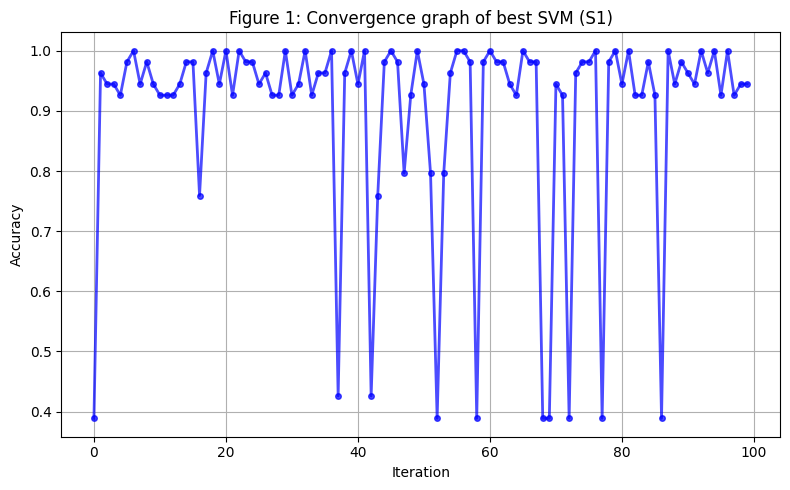

In [11]:
# Plot convergence graph
plt.figure(figsize=(8, 5))
plt.plot(best_convergence, color='blue', alpha=0.7, linewidth=2, marker='o', markersize=4)
plt.title(f"Figure 1: Convergence graph of best SVM ({best_sample_label})")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()